In [96]:
import pandas as pd
import numpy as np
import geopandas
import shapely.geometry as geom
import geoplot as gplt
import matplotlib.pyplot as plt

In [89]:
od_matrix = pd.read_csv('/local/tarciso/data/od-matrix/full/2017_05_02_full_od_trips.csv', parse_dates=['start_time', 'end_time'])

In [90]:
od_matrix.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration
0,2088629.0,271297,3,1,625,GA162,10.0,35713.0,2017-05-02 16:43:11,-25.496938,-49.290224,27639.0,2017-05-02 16:47:07,-25.492111,-49.293211,0 days 00:03:56.000000000
1,2088629.0,271297,3,3,607,HL328,5.0,26247.0,2017-05-02 16:54:03,-25.492115,-49.293043,25920.0,2017-05-02 17:12:07,-25.440314,-49.271795,0 days 00:18:04.000000000
2,3811772.0,271391,6,2,602,GR027,8.0,25402.0,2017-05-02 16:16:10,-25.481021,-49.292618,25478.0,2017-05-02 17:09:17,-25.489676,-49.243255,0 days 00:53:07.000000000
3,2376410.0,271392,1,1,535,EA077,14.0,36874.0,2017-05-02 16:44:09,-25.553459,-49.250936,30030.0,2017-05-02 17:04:48,-25.517281,-49.230276,0 days 00:20:39.000000000
4,2376410.0,271392,1,3,505,BL320,9.0,30024.0,2017-05-02 17:21:56,-25.516362,-49.230703,26264.0,2017-05-02 17:31:09,-25.481215,-49.246966,0 days 00:09:13.000000000


In [100]:
od_matrix = od_matrix.sort_values(['cardNum','user_trip_id','itinerary_id','leg_id'])
od_matrix['start_hour'] = od_matrix['start_time'].dt.hour
od_matrix['time_of_day'] = np.where(od_matrix['start_hour'] < 12, 'morning', 
                                   np.where(od_matrix['start_hour'] < 18, 'afternoon',
                                           'night'))

In [102]:
od_matrix.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration,start_hour,time_of_day
10968,229948.0,21697,10,1,654,HA011,2.0,35350.0,2017-05-02 06:20:17,-25.492665,-49.303977,27485.0,2017-05-02 06:22:55,-25.492010,-49.293363,0 days 00:02:38.000000000,6,morning
10969,229948.0,21697,10,3,607,HL302,1.0,26247.0,2017-05-02 06:25:49,-25.492115,-49.293043,26232.0,2017-05-02 07:03:23,-25.407047,-49.252644,0 days 00:37:34.000000000,6,morning
11168,229948.0,370349,7,2,22,BL324,7.0,25683.0,2017-05-02 19:09:37,-25.410622,-49.248224,26246.0,2017-05-02 20:01:31,-25.491786,-49.293089,0 days 00:51:54.000000000,19,night
8911,230146.0,386340,1,2,602,HR041,11.0,25798.0,2017-05-02 19:43:00,-25.525441,-49.230906,25481.0,2017-05-02 19:54:03,-25.495178,-49.240568,0 days 00:11:03.000000000,19,night
8974,230146.0,418505,2,2,502,HR030,13.0,25423.0,2017-05-02 22:35:42,-25.496209,-49.240180,27353.0,2017-05-02 22:42:23,-25.516618,-49.230300,0 days 00:06:41.000000000,22,night


In [114]:
od_matrix['from_loc'] = list(zip(od_matrix.from_stop_lon, od_matrix.from_stop_lat))
od_matrix['to_loc'] = list(zip(od_matrix.to_stop_lon, od_matrix.to_stop_lat))

#sample_od_matrix['trip'] = list(zip(sample_od_matrix.from_stop_lon, sample_od_matrix.from_stop_lat),
#                                    zip(sample_od_matrix.to_stop_lon, sample_od_matrix.to_stop_lat))

In [115]:
od_matrix.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration,start_hour,time_of_day,from_loc,to_loc
10968,229948.0,21697,10,1,654,HA011,2.0,35350.0,2017-05-02 06:20:17,-25.492665,-49.303977,27485.0,2017-05-02 06:22:55,-25.492010,-49.293363,0 days 00:02:38.000000000,6,morning,"(-49.303977106499005, -25.492664676856)","(-49.293362678236, -25.492009583472)"
10969,229948.0,21697,10,3,607,HL302,1.0,26247.0,2017-05-02 06:25:49,-25.492115,-49.293043,26232.0,2017-05-02 07:03:23,-25.407047,-49.252644,0 days 00:37:34.000000000,6,morning,"(-49.293043201293, -25.492114522446)","(-49.252644063181, -25.407046951015)"
11168,229948.0,370349,7,2,22,BL324,7.0,25683.0,2017-05-02 19:09:37,-25.410622,-49.248224,26246.0,2017-05-02 20:01:31,-25.491786,-49.293089,0 days 00:51:54.000000000,19,night,"(-49.248223893301, -25.410621916055998)","(-49.293088798846, -25.491786465484)"
8911,230146.0,386340,1,2,602,HR041,11.0,25798.0,2017-05-02 19:43:00,-25.525441,-49.230906,25481.0,2017-05-02 19:54:03,-25.495178,-49.240568,0 days 00:11:03.000000000,19,night,"(-49.230906144201, -25.525441033178)","(-49.240567811092994, -25.495178470521)"
8974,230146.0,418505,2,2,502,HR030,13.0,25423.0,2017-05-02 22:35:42,-25.496209,-49.240180,27353.0,2017-05-02 22:42:23,-25.516618,-49.230300,0 days 00:06:41.000000000,22,night,"(-49.240180131692, -25.496209215173)","(-49.230300314985, -25.51661831653)"


In [116]:
od_matrix['from_loc'] = od_matrix['from_loc'].apply(geom.Point)
od_matrix['to_loc'] = od_matrix['to_loc'].apply(geom.Point)

#sample_od_matrix['trip_locs'] = sample_od_matrix['trip'].apply(geom.MultiPoint)

In [117]:
od_matrix.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration,start_hour,time_of_day,from_loc,to_loc
10968,229948.0,21697,10,1,654,HA011,2.0,35350.0,2017-05-02 06:20:17,-25.492665,-49.303977,27485.0,2017-05-02 06:22:55,-25.492010,-49.293363,0 days 00:02:38.000000000,6,morning,POINT (-49.303977106499 -25.492664676856),POINT (-49.293362678236 -25.492009583472)
10969,229948.0,21697,10,3,607,HL302,1.0,26247.0,2017-05-02 06:25:49,-25.492115,-49.293043,26232.0,2017-05-02 07:03:23,-25.407047,-49.252644,0 days 00:37:34.000000000,6,morning,POINT (-49.293043201293 -25.492114522446),POINT (-49.252644063181 -25.407046951015)
11168,229948.0,370349,7,2,22,BL324,7.0,25683.0,2017-05-02 19:09:37,-25.410622,-49.248224,26246.0,2017-05-02 20:01:31,-25.491786,-49.293089,0 days 00:51:54.000000000,19,night,POINT (-49.248223893301 -25.410621916056),POINT (-49.293088798846 -25.491786465484)
8911,230146.0,386340,1,2,602,HR041,11.0,25798.0,2017-05-02 19:43:00,-25.525441,-49.230906,25481.0,2017-05-02 19:54:03,-25.495178,-49.240568,0 days 00:11:03.000000000,19,night,POINT (-49.230906144201 -25.525441033178),POINT (-49.24056781109299 -25.495178470521)
8974,230146.0,418505,2,2,502,HR030,13.0,25423.0,2017-05-02 22:35:42,-25.496209,-49.240180,27353.0,2017-05-02 22:42:23,-25.516618,-49.230300,0 days 00:06:41.000000000,22,night,POINT (-49.240180131692 -25.496209215173),POINT (-49.230300314985 -25.51661831653)


In [118]:
gdf = geopandas.GeoDataFrame(od_matrix, geometry='from_loc')

In [119]:
gdf.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration,start_hour,time_of_day,from_loc,to_loc
10968,229948.0,21697,10,1,654,HA011,2.0,35350.0,2017-05-02 06:20:17,-25.492665,-49.303977,27485.0,2017-05-02 06:22:55,-25.492010,-49.293363,0 days 00:02:38.000000000,6,morning,POINT (-49.303977106499 -25.492664676856),POINT (-49.293362678236 -25.492009583472)
10969,229948.0,21697,10,3,607,HL302,1.0,26247.0,2017-05-02 06:25:49,-25.492115,-49.293043,26232.0,2017-05-02 07:03:23,-25.407047,-49.252644,0 days 00:37:34.000000000,6,morning,POINT (-49.293043201293 -25.492114522446),POINT (-49.252644063181 -25.407046951015)
11168,229948.0,370349,7,2,22,BL324,7.0,25683.0,2017-05-02 19:09:37,-25.410622,-49.248224,26246.0,2017-05-02 20:01:31,-25.491786,-49.293089,0 days 00:51:54.000000000,19,night,POINT (-49.248223893301 -25.410621916056),POINT (-49.293088798846 -25.491786465484)
8911,230146.0,386340,1,2,602,HR041,11.0,25798.0,2017-05-02 19:43:00,-25.525441,-49.230906,25481.0,2017-05-02 19:54:03,-25.495178,-49.240568,0 days 00:11:03.000000000,19,night,POINT (-49.230906144201 -25.525441033178),POINT (-49.24056781109299 -25.495178470521)
8974,230146.0,418505,2,2,502,HR030,13.0,25423.0,2017-05-02 22:35:42,-25.496209,-49.240180,27353.0,2017-05-02 22:42:23,-25.516618,-49.230300,0 days 00:06:41.000000000,22,night,POINT (-49.240180131692 -25.496209215173),POINT (-49.230300314985 -25.51661831653)


In [120]:
ctba_shape = geopandas.read_file('/local/tarciso/workspace/people-paths/metadata/41CURITI.shp')

In [121]:
ctba_shape

,ID,AREA,CODSETOR,CODGR,NOMEGR,CODUF,NOMEUF,CODMESO,NOMEMESO,CODMICRO,...,V0587,V0602,V0603,V0604,V0605,V0611,VAR12,DENSDEMO,ARQUIVO,geometry
0,253,7.34,410690205080166,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,11,0,30,53,38,14,1123,153,41CURITI,"(POLYGON ((-49.276195 -25.611235, -49.276498 -..."
1,259,0.56,410690205080167,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,6,0,9,35,31,7,585,1036,41CURITI,"POLYGON ((-49.29024 -25.562443, -49.290589 -25..."
2,260,5.15,410690205080165,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,11,0,22,32,29,36,863,167,41CURITI,"POLYGON ((-49.27738 -25.594143, -49.277721 -25..."
3,261,1.76,410690205080162,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,5,0,18,12,22,16,638,362,41CURITI,"POLYGON ((-49.293445 -25.579994, -49.293508 -2..."
4,269,0.23,410690205080156,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,16,0,25,45,38,31,780,3326,41CURITI,"POLYGON ((-49.286509 -25.547657, -49.286889 -2..."
5,300,1.06,410690205080182,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,4,0,18,19,31,14,526,494,41CURITI,"POLYGON ((-49.288255 -25.547352, -49.287996 -2..."
6,301,0.42,410690205080163,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,12,3,15,32,49,8,892,2122,41CURITI,"POLYGON ((-49.288427 -25.564669, -49.288518 -2..."
7,303,0.06,410690205080179,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,7,0,14,37,47,2,643,10509,41CURITI,"POLYGON ((-49.284066 -25.552891, -49.283443 -2..."
8,306,0.03,410690205080153,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,2,0,14,22,10,16,278,9849,41CURITI,"POLYGON ((-49.286509 -25.542809, -49.288861999..."
9,308,0.53,410690205080111,4,SUL,41,PARANA,4110,METROPOLITANA DE CURITIBA,41037,...,18,1,17,51,53,32,1051,1972,41CURITI,"POLYGON ((-49.286509 -25.547657, -49.28591 -25..."


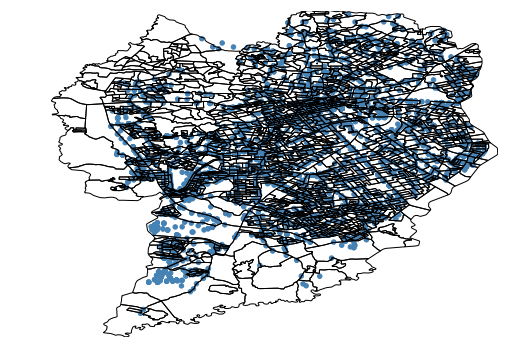

In [122]:
ax = gplt.pointplot(gdf.sample(10000))
gplt.polyplot(ctba_shape, ax=ax)

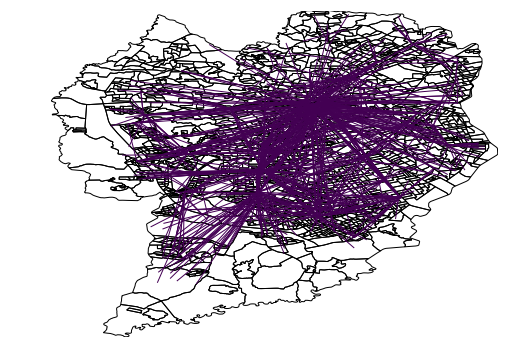

In [132]:
ax = gplt.sankey(gdf[gdf.time_of_day == 'morning'].sample(1000), start='from_loc', end='to_loc',
            hue='time_of_day', categorical=True)
gplt.polyplot(ctba_shape, ax=ax)

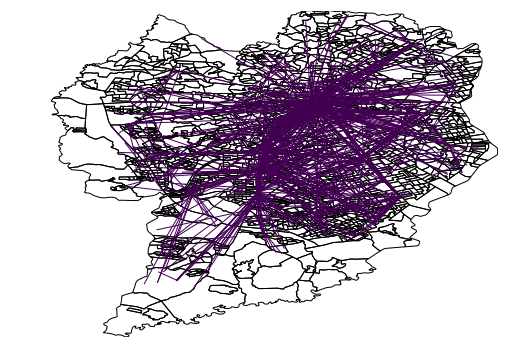

In [133]:
ax = gplt.sankey(gdf[gdf.time_of_day == 'afternoon'].sample(1000), start='from_loc', end='to_loc',
            hue='time_of_day', categorical=True)
gplt.polyplot(ctba_shape, ax=ax)

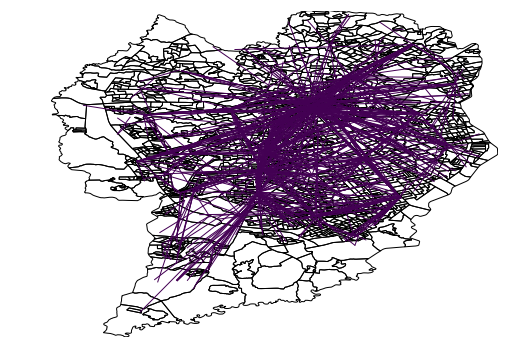

In [134]:
ax = gplt.sankey(gdf[gdf.time_of_day == 'night'].sample(1000), start='from_loc', end='to_loc',
            hue='time_of_day', categorical=True)
gplt.polyplot(ctba_shape, ax=ax)

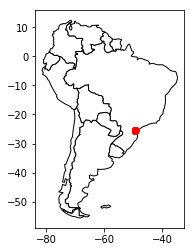

In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()